In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import chi2_contingency

species_info = pd.read_csv('species_info.csv')

print('SPECIES INFO DF: \n')
print(species_info.info())  # general info about columns, non-null count, dtypes
print(species_info.describe())  # statistical summary
print(species_info.head(10))  # first 10 rows 
print('Unique values of species info, per colum:')  # analyse unique values
for col in species_info.columns:
    print(f'Column: {col}, Number of Unique values: {species_info[col].nunique()}, Unique values: {species_info[col].unique()}')
# short conclusion
print('Main conclusions: 4 columns of categorical variables (dtype:object) with 5824 entries. Nan values are observed in the 4th column named conservation_status.')


SPECIES INFO DF: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
  category                scientific_name  \
0   Mammal  Clethr

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Since chi2: 533.2083333333333 is very large, there is a relationship between conservation status and species.


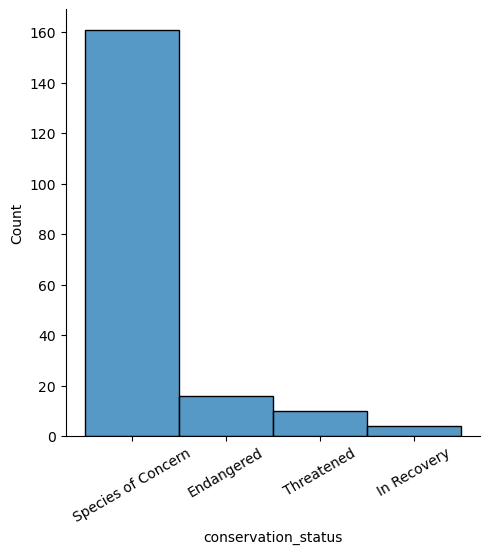

In [2]:
# visualisations
sns.displot(species_info, x='conservation_status')
plt.xticks(rotation=30)

# contigency table to acess the relationship between variables
conservation_status_scientific_name_freq = pd.crosstab(species_info.conservation_status, species_info.scientific_name)
chi2, pval, dof, expected = chi2_contingency(conservation_status_scientific_name_freq)
print(f'Since chi2: {chi2} is very large, there is a relationship between conservation status and species.')

In [3]:
# Load observations data and short exploratory analysis
observations = pd.read_csv('observations.csv')

print('\n OBSERVATIONS DF: \n')
print(observations.info())  # general info about columns, non-null count, dtypes
print(observations.describe())  # statistical summary
print(observations.head(10))  # first 10 rows 
print('Unique values of observations, per colum:')  # analyse unique values
for col in observations.columns:
    print(f'Column: {col}, Number of Unique values: {observations[col].nunique()}, Unique values: {observations[col].unique()}')
# short conclusion
print('Main conclusions: 2 columns of categorical variables (dtype:object) and 1 of numerical variable (dtype:int64) with 23296 entries. There are no Nan values.')


 OBSERVATIONS DF: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis sp

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

The most common species in Great Smoky Mountains National Park is the Sonchus asper ssp. asper with 147 observations.
The most common species in Yosemite National Park is the Ivesia shockleyi var. shockleyi with 223 observations.
The most common species in Bryce National Park is the Valerianella radiata with 176 observations.
The most common species in Yellowstone National Park is the Lycopodium tristachyum with 321 observations.


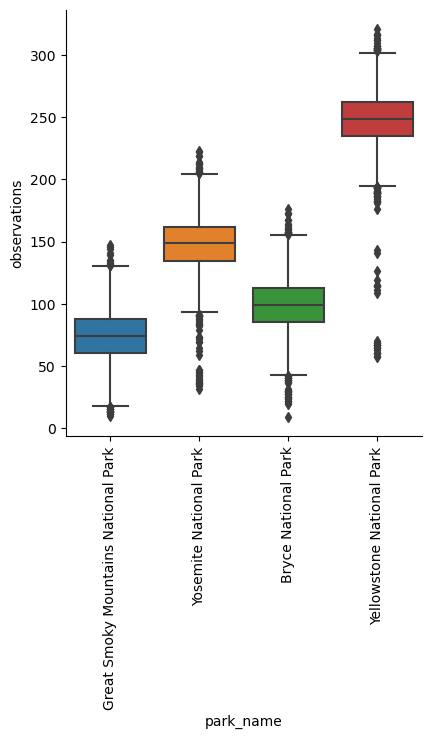

In [44]:
# visualisation of the observations per park
sns.catplot(data=observations, x="park_name", y="observations", kind="box")
plt.xticks(rotation=90)

for park in observations['park_name'].unique():
    df_park = observations[observations['park_name'] ==park]
    common_specie_park = observations.loc[(observations['park_name'] ==park) & (df_park['observations']==df_park['observations'].max())]
    species = common_specie_park['scientific_name'].item()
    obs = common_specie_park['observations'].item()
    print(f'The most common species in {park} is the {species} with {obs} observations.')

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0                 NaN                  Bryce National Park           130  
1                 NaN            Yellowstone National Park           270  
2                 NaN  Great Smoky Mountains National Park            98  
3                 NaN               Yosemite National Park           117  
4                 NaN               Yosemite National Park           128  


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bryce National Park'),
  Text(1, 0, 'Yellowstone National Park'),
  Text(2, 0, 'Great Smoky Mountains National Park'),
  Text(3, 0, 'Yosemite National Park')])

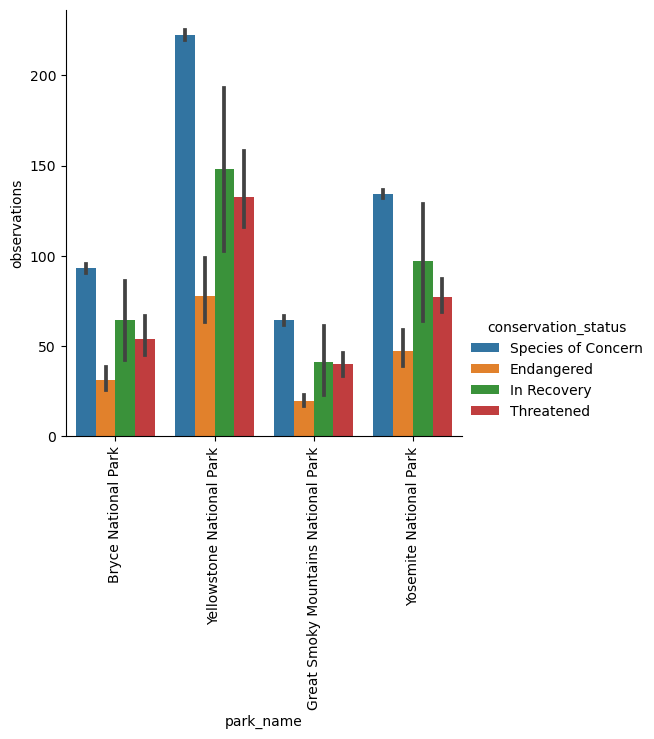

In [52]:
species_observations = pd.merge(species_info, observations, on='scientific_name', how='inner')
print(species_observations.head())
sns.catplot(data=species_observations, x="park_name", y="observations", hue='conservation_status', kind="bar")
plt.xticks(rotation=90)